# Análisis comparativo de planes telefónicos Megaline

## Contenido

* [Introducción](#intro)
* [1. Descripción y preparación de los datos](#data_review)
    * [1.1 Planes](#plans)
    * [1.2 Usuarios/as](#users)
    * [1.3 Llamadas](#calls)
    * [1.4 Mensajes](#messages)
    * [1.5 Internet](#data)
* [2. Evaluación de las tarifas por usuario](#'user_rates')
* [3. Análisis del comportamiento de los usuarios](#data_analysis) 
    * [3.1 Análisis de llamadas](#calls_analysis)
    * [3.2 Análisis de mensajes](#messages_analysis)  
    * [3.3 Análisis de internet](#internet_analysis)
    * [3.4 Análisis de ingresos](#income_analysis)
* [4. Pruebas de las hipótesis estadísticas](#hypothesis)
    * [4.1. Hipótesis 1: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere](#hypothesis_1)
    * [4.2. Hipótesis 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones](#hypothesis_2)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>

El operador de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña, los datos de 500 clientes de Megaline. Estos datos tendrán información de quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El objetivo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. También se pretende probar las siguientes hipótesis:

- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

### Descripción de las tarifas
Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

#### Surf

Pago mensual: $20.  
500 minutos al mes, 50 SMS y 15 GB de datos.  
Si se exceden los límites del paquete:  
1 minuto: 3 centavos.  
1 SMS: 3 centavos.  
1 GB de datos: $10.

#### Ultimate

Pago mensual: $70.  
3000 minutos al mes, 1000 SMS y 30 GB de datos.  
Si se exceden los límites del paquete:  
1 minuto: 1 centavo.  
1 SMS: 1 centavo.  
1 GB de datos: $7.  
Diccionario de datos

### Diccionario de datos

La tabla users (datos sobre los usuarios):
- user_id: identificador único del usuario.
- first_name: nombre del usuario.
- last_name: apellido del usuario.
- age: edad del usuario (en años).
- reg_date: fecha de suscripción (dd, mm, aa).
- churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
- city: ciudad de residencia del usuario.
- plan: nombre de la tarifa.

La tabla calls (datos sobre las llamadas):
- id: identificador único de la llamada.
- call_date: fecha de la llamada.
- duration: duración de la llamada (en minutos).
- user_id: el identificador del usuario que realiza la llamada.

La tabla messages (datos sobre los SMS):
- id: identificador único del SMS.
- message_date: fecha del SMS.
- user_id: el identificador del usuario que manda el SMS.

La tabla internet (datos sobre las sesiones web):
- id: identificador único de la sesión.
- mb_used: el volumen de datos gastados durante la sesión (en megabytes).
- session_date: fecha de la sesión web.
- user_id: identificador del usuario.

La tabla plans (datos sobre las tarifas):
- plan_name: nombre de la tarifa.
- usd_monthly_fee: pago mensual en dólares estadounidenses.
- minutes_included: minutos incluidos al mes.
- messages_included: SMS incluidos al mes.
- mb_per_month_included: datos incluidos al mes (en megabytes).
- usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
- usd_per_message: precio por SMS tras exceder los límites del paquete.
- usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

## 1. Descripción y preparación de los datos. <a id='data_review'></a>

Los datos para este proyecto se dividen en varias tablas. Se explorará cada una para tener una comprensión inicial de los datos y, si es necesario, realizando las correcciones requeridas en cada tabla.

In [ ]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Carga los archivos de datos en diferentes DataFrames
users_df = pd.read_csv('/datasets/megaline_users.csv')
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')

### 1.1 Planes. <a id='plans'></a>

In [49]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [50]:
# Imprime una muestra de los datos para las tarifas
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En nuestros registros solo se observa que la columna que describe los megabytes incluidos en el plan, no se encuentra en GB, lo cual sería más práctico dada la información de cómo se realizan los cobros. Estos deberían ser los números descritos en el plan: 15 y 30 (GB). Además, debemos incluir una corrección al título de dicha columna para que represente correctamente su contenido.

In [51]:
# Correcciones en plans_df.
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'] // 1024 # Actualizar el valor de mb a gb.
plans_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True) # Actualizar el nombre de la columna

print(plans_df.info())
plans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


### 1.2. Usuarios/as. <a id='users'></a>

In [52]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [53]:
# Imprime una muestra de datos para usuarios
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
363,1363,Sandee,Lott,33,"Seattle-Tacoma-Bellevue, WA MSA",2018-01-05,ultimate,2018-08-16
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaN
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaN
264,1264,Jessie,Hill,69,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-03,ultimate,NaN
116,1116,Moriah,Yates,60,"Cincinnati, OH-KY-IN MSA",2018-08-08,surf,NaN


En el caso de esta tabla encontramos que la columna user_id es del tipo int, esto podría cambiarse al tipo string (object). Otra observación es sobre las columnas reg_date y churn_date las cuales podrían ser del tipo datetime. No se observan valores ausentes que no sean justificados.

In [54]:
# Correcciones en users_df.
users_df['user_id'] = users_df['user_id'].astype('object') # Cambio del tipo de dato de int a object.
users_df['reg_date'] = pd.to_datetime(users_df['reg_date']) # Cambio del tipo de dato de object a datetime.
users_df['churn_date'] = pd.to_datetime(users_df['churn_date']) # Cambio del tipo de dato de object a datetime.

print(users_df.info())
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### 1.3. Llamadas. <a id='calls'></a>

In [55]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [56]:
# Imprime una muestra de datos para las llamadas
calls_df.sample(5)

,id,user_id,call_date,duration
2081,1009_503,1009,2018-05-21,10.87
47770,1172_361,1172,2018-09-27,2.91
32677,1123_35,1123,2018-07-06,6.18
23825,1088_320,1088,2018-12-26,5.39
25564,1098_249,1098,2018-08-31,17.84


En el caso de esta tabla encontramos que la columna user_id es del tipo int, esto podría cambiarse al tipo string (object). Otra observación es sobre la columna call_date la cual podría ser del tipo datetime. No se observan valores ausentes.

In [57]:
# Correcciones en calls_df.
calls_df['user_id'] = calls_df['user_id'].astype('object') # Cambio del tipo de dato de int a object.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date']) # Cambio del tipo de dato de object a datetime.

print(calls_df.info())
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Usaremos una nueva columna para representar el mes de cada llamada en esta tabla; será útil para futuras evaluaciones.

In [58]:
# Adicionar la columna de mes.
calls_df['call_date_month'] = calls_df['call_date'].dt.month
calls_df

,id,user_id,call_date,duration,call_date_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


### 1.4. Mensajes. <a id='messages'></a>

In [59]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [60]:
# Imprime una muestra de datos para los mensajes
messages_df.sample(5)

,id,user_id,message_date
47566,1324_281,1324,2018-07-28
9483,1069_564,1069,2018-10-11
27347,1167_304,1167,2018-10-23
46938,1320_182,1320,2018-07-21
51187,1331_362,1331,2018-09-02


En el caso de esta tabla encontramos que la columna user_id es del tipo int, esto podría cambiarse al tipo string (object). Otra observación es sobre la columna message_date la cual podría ser del tipo datetime. No se observan valores ausentes.

In [61]:
# Correcciones en messages_df.
messages_df['user_id'] = messages_df['user_id'].astype('object') # Cambio del tipo de dato de int a object.
messages_df['message_date'] = pd.to_datetime(messages_df['message_date']) # Cambio del tipo de dato de object a datetime.

print(messages_df.info())
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Nuevamente, usaremos una nueva columna para representar el mes de cada mensaje.

In [62]:
# Adicionar la columna de mes.
messages_df['message_date_month'] = messages_df['message_date'].dt.month
messages_df

,id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


### 1.5. Internet. <a id='data'></a>

In [63]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [64]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.sample(5)

,id,user_id,session_date,mb_used
42899,1191_78,1191,2018-12-12,645.95
74176,1347_271,1347,2018-10-04,700.23
27913,1128_67,1128,2018-07-13,751.94
10384,1053_457,1053,2018-10-19,497.84
32609,1147_233,1147,2018-12-10,248.40


En esta tabla encontramos que la columna user_id es del tipo int, esto podría cambiarse al tipo string (object). Otra observación es sobre la columna session_date la cual podría ser del tipo datetime. No se observan valores ausentes.

In [65]:
# Correcciones en internet_df.
internet_df['user_id'] = internet_df['user_id'].astype('object') # Cambio del tipo de dato de int a object.
internet_df['session_date'] = pd.to_datetime(internet_df['session_date']) # Cambio del tipo de dato de object a datetime.

print(internet_df.info())
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Aquí también utilizaremos una nueva columna para representar el mes de cada sesión.

In [66]:
# Adicionar la columna de mes.
internet_df['session_date_month'] = internet_df['session_date'].dt.month
internet_df

,id,user_id,session_date,mb_used,session_date_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## 2. Evaluación de las tarifas por usuario. <a id='user_rates'></a>

Aquí tendremos en cuenta las condiciones de las tarifas y los datos de los usuarios para calcular el costo de cada tarifa por usuario. Esto nos permitirá comparar las tarifas Surf y Ultimate.

In [ ]:
# Imprime las condiciones de la tarifa
plans_df

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Ahora que los datos están limpios, se agregan los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior. Esto se realizará para las llamadas, mensajes y datos de internet. Luego, se calculará el costo de cada tarifa por usuario y por periodo.

In [ ]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
user_calls_per_month = calls_df.groupby(['user_id', 'call_date_month'])['call_date_month'].count() # Agrupa por usuario y mes, y cuenta el número de llamadas.

user_calls_per_month = pd.DataFrame(user_calls_per_month) # Convierte la Serie resultante en un DataFrame.

# Organiza el DataFrame resultante.
user_calls_per_month.columns = ['calls_per_month']
user_calls_per_month.index.names = ['user_id', 'month']
user_calls_per_month.reset_index(inplace=True)

user_calls_per_month

,user_id,month,calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [ ]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
user_mins_per_month = calls_df.groupby(['user_id', 'call_date_month'])['duration'].sum() # Agrupa por usuario y mes, y suma la duración de las llamadas.

user_mins_per_month = pd.DataFrame(user_mins_per_month) # Convierte la Serie resultante en un DataFrame.

# Organiza el DataFrame resultante.
user_mins_per_month.columns = ['mins_per_month']
user_mins_per_month.index.names = ['user_id', 'month']
user_mins_per_month.reset_index(inplace=True)

user_mins_per_month['mins_per_month'] = np.ceil(user_mins_per_month['mins_per_month']) # Redondear hacia arriba

user_mins_per_month

,user_id,month,mins_per_month
0,1000,12,117.0
1,1001,8,172.0
2,1001,9,298.0
3,1001,10,375.0
4,1001,11,405.0
...,...,...,...
2253,1498,12,325.0
2254,1499,9,331.0
2255,1499,10,364.0
2256,1499,11,289.0


In [ ]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
user_mess_per_month = messages_df.groupby(['user_id', 'message_date_month'])['message_date_month'].count() # Agrupa por usuario y mes, y cuenta el número de mensajes.

user_mess_per_month = pd.DataFrame(user_mess_per_month) # Convierte la Serie resultante en un DataFrame.

# Organiza el DataFrame resultante.
user_mess_per_month.columns = ['mess_per_month']
user_mess_per_month.index.names = ['user_id', 'month']
user_mess_per_month.reset_index(inplace=True)

user_mess_per_month

,user_id,month,mess_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
user_mb_per_month = internet_df.groupby(['user_id', 'session_date_month'])['mb_used'].sum() # Agrupa por usuario y mes, y suma el tráfico de Internet.

user_mb_per_month = pd.DataFrame(user_mb_per_month) # Convierte la Serie resultante en un DataFrame.

#  Organiza el DataFrame resultante.
user_mb_per_month.columns = ['mb_per_month']
user_mb_per_month.index.names = ['user_id', 'month']
user_mb_per_month.reset_index(inplace=True)

# Calcula los GB por mes y redondea hacia arriba.
user_mb_per_month['gb_per_month'] = user_mb_per_month['mb_per_month'] / 1024 # Calcula los GB
user_mb_per_month['gb_per_month'] = np.ceil(user_mb_per_month['gb_per_month']) # Redondear hacia arriba

user_mb_per_month

,user_id,month,mb_per_month,gb_per_month
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


Ahora se juntan los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [72]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
all_month_data = user_calls_per_month.merge(user_mins_per_month, how='outer', on=['user_id', 'month'])
all_month_data = all_month_data.merge(user_mess_per_month, how='outer', on=['user_id', 'month'])
all_month_data = all_month_data.merge(user_mb_per_month, how='outer', on=['user_id', 'month'])

# Relleno de datos nulos
all_month_data.fillna(0, inplace=True)

all_month_data

,user_id,month,calls_per_month,mins_per_month,mess_per_month,mb_per_month,gb_per_month
0,1000,12,16.0,117.0,11.0,1901.47,2.0
1,1001,8,27.0,172.0,30.0,6919.15,7.0
2,1001,9,49.0,298.0,44.0,13314.82,14.0
3,1001,10,65.0,375.0,53.0,22330.49,22.0
4,1001,11,64.0,405.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


In [73]:
# Añade la información de la tarifa
all_month_data = all_month_data.merge(users_df[['user_id', 'plan']], how='left', on=['user_id'])

# Ajustar los tipos de las columnas
all_month_data['calls_per_month'] = all_month_data['calls_per_month'].astype('int')
all_month_data['mins_per_month'] = all_month_data['mins_per_month'].astype('int')
all_month_data['mess_per_month'] = all_month_data['mess_per_month'].astype('int')
all_month_data['gb_per_month'] = all_month_data['gb_per_month'].astype('int')

all_month_data

,user_id,month,calls_per_month,mins_per_month,mess_per_month,mb_per_month,gb_per_month,plan
0,1000,12,16,117,11,1901.47,2,ultimate
1,1001,8,27,172,30,6919.15,7,surf
2,1001,9,49,298,44,13314.82,14,surf
3,1001,10,65,375,53,22330.49,22,surf
4,1001,11,64,405,36,18504.30,19,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039.91,13,surf
2289,1361,5,0,0,2,1519.69,2,surf
2290,1482,10,0,0,2,0.00,0,ultimate
2291,1108,12,0,0,0,233.17,1,ultimate


Ya tenemos todo preparado para calcular los ingresos mensuales por usuario, este proceso se realiza de la siguiente manera: 
1. Se resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos.
2. Se multiplica el resultado por el valor del plan de llamadas.
3. Se añade la tarifa mensual en función del plan de llamadas.
4. Se suma el costo de los minutos, mensajes de texto y datos que exceden el límite del paquete.

La siguiente función será la encargada de calcular el costo de cada tarifa por usuario y por periodo. Esta función toma como entrada una fila del DataFrame con los datos agregados y devuelve el valor con los ingresos mensuales para el usuario.

In [74]:
def calculate_monthly_income(row):
    """
    Calcula el ingreso mensual generado por un usuario en función de su plan de suscripción 
    y el uso de minutos, mensajes y datos adicionales.

    Parámetros:
    row (pd.Series): Fila de un DataFrame que contiene la información de un usuario, incluyendo:
        - 'plan' (str): Nombre del plan del usuario.
        - 'mins_per_month' (int): Minutos utilizados en el mes.
        - 'mess_per_month' (int): Mensajes enviados en el mes.
        - 'gb_per_month' (int): Datos (GB) consumidos en el mes.

    Retorna:
    float: Ingreso mensual total generado por el usuario, considerando el costo base del plan 
           y los cargos adicionales por excedentes en minutos, mensajes y datos.
    """
    plan_data = plans_df[plans_df['plan_name'] == row['plan']].iloc[0]

    month_charge = plan_data['usd_monthly_pay']

    extra_mins = row['mins_per_month'] - plan_data['minutes_included']
    extra_mins_charge = max(0, extra_mins * plan_data['usd_per_minute'])

    extra_mess = row['mess_per_month'] - plan_data['messages_included']
    extra_mess_charge = max(0, extra_mess * plan_data['usd_per_message'])

    extra_gb = row['gb_per_month'] - plan_data['gb_per_month_included']
    extra_gb_charge = max(0, extra_gb * plan_data['usd_per_gb'])

    income = month_charge + extra_mins_charge + extra_mess_charge + extra_gb_charge

    return income

In [ ]:
# Aplica la función para calcular el ingreso mensual de cada usuario.
all_month_data['income'] = all_month_data.apply(calculate_monthly_income, axis=1)
all_month_data

,user_id,month,calls_per_month,mins_per_month,mess_per_month,mb_per_month,gb_per_month,plan,income
0,1000,12,16,117,11,1901.47,2,ultimate,70.00
1,1001,8,27,172,30,6919.15,7,surf,20.00
2,1001,9,49,298,44,13314.82,14,surf,20.00
3,1001,10,65,375,53,22330.49,22,surf,90.09
4,1001,11,64,405,36,18504.30,19,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039.91,13,surf,20.33
2289,1361,5,0,0,2,1519.69,2,surf,20.00
2290,1482,10,0,0,2,0.00,0,ultimate,70.00
2291,1108,12,0,0,0,233.17,1,ultimate,70.00


## 3. Análisis del comportamiento de los usuarios. <a id='data_analysis'></a>

El objetivo de este análisis será calcular algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Se acudirá a gráficos para facilitar la comprensión dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable.

### 3.1 Análisis de llamadas. <a id='calls_analysis'></a>

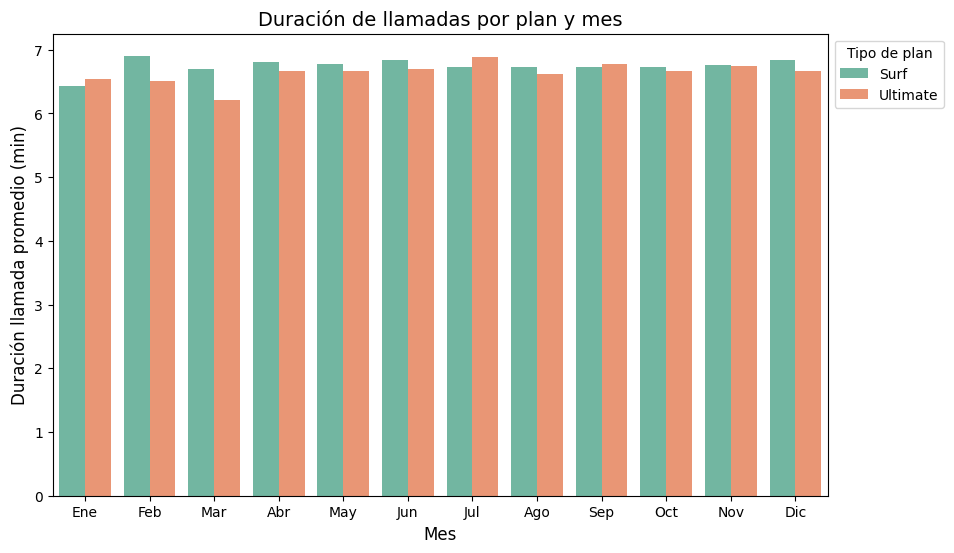

In [ ]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
calls_and_plans = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left') # Incluir el plan en la tabla de llamadas.
avg_calls_dur_by_plans_and_months = calls_and_plans.groupby(['plan', 'call_date_month'])['duration'].mean() # Calcular el promedio de duracion de llamada

# Configurar el nuevo dataframe
duration_avg_df = pd.DataFrame(avg_calls_dur_by_plans_and_months)
duration_avg_df.reset_index(inplace=True)

# Crear la visualización
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette("Set2")
ax = sns.barplot(data=duration_avg_df, x='call_date_month', y='duration', hue='plan', palette=custom_palette, ci=None)

# Cambiar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Surf', 'Ultimate'], title="Tipo de plan", loc="upper left", bbox_to_anchor=(1, 1))

# Agregar título y etiquetas a los ejes
plt.title("Duración de llamadas por plan y mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Duración llamada promedio (min)", fontsize=12)
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

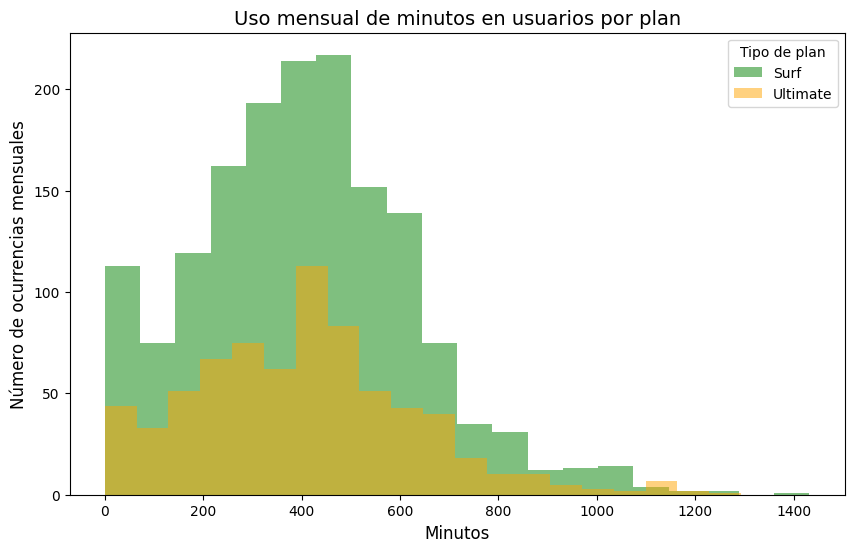

In [ ]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan.
surf_users = all_month_data[all_month_data['plan'] == 'surf'] # Usuarios surf
ultimate_users = all_month_data[all_month_data['plan'] == 'ultimate'] # Usuarios ultimate

# Visualización de los minutos mensuales por plan.
plt.figure(figsize=(10, 6))
surf_users['mins_per_month'].plot(kind='hist', bins=20, color='green', alpha=0.5, legend=True)
ultimate_users['mins_per_month'].plot(kind='hist', bins=20, color='orange', alpha=0.5, legend=True)

# Agregar título y etiquetas a los ejes
plt.title("Uso mensual de minutos en usuarios por plan", fontsize=14)
plt.xlabel("Minutos", fontsize=12)
plt.ylabel("Número de ocurrencias mensuales", fontsize=12)
plt.legend(['Surf', 'Ultimate'], title='Tipo de plan')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Media y varianza para usuarios Surf.
surf_calls_dur_mean = calls_and_plans[calls_and_plans['plan'] == 'surf']['duration'].mean()
surf_calls_dur_var = np.var(calls_and_plans[calls_and_plans['plan'] == 'surf']['duration'])

# Media y varianza para usuarios Ultimate.
ultimate_calls_dur_mean = calls_and_plans[calls_and_plans['plan'] == 'ultimate']['duration'].mean()
ultimate_calls_dur_var = np.var(calls_and_plans[calls_and_plans['plan'] == 'ultimate']['duration'])


print(f'El promedio de duración de una llamada es de {surf_calls_dur_mean:.2f} minutos para usuarios Surf y de {ultimate_calls_dur_mean:.2f} minutos para usuarios Ultimate.')
print(f'La varianza de duración de una llamada es de {surf_calls_dur_var:.2f} minutos cuadrados para usuarios Surf y de {ultimate_calls_dur_var:.2f} minutos cuadrados para usuarios Ultimate.')

El promedio de duracion de una llamada es de 6.77 minutos para usuarios Surf y de 6.70 minutos para usuarios Ultimate.
La varianza de duracion de una llamada es de 34.16 minutos cuadrados para usuarios Surf y de 33.96 minutos cuadrados para usuarios Ultimate.


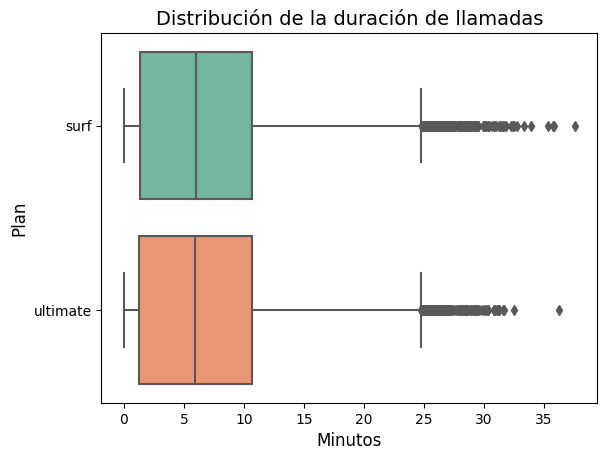

In [79]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=calls_and_plans, x="duration", y="plan", palette="Set2", order=["surf", "ultimate"])

# Agregar título y etiquetas a los ejes
plt.title("Distribución de la duración de llamadas", fontsize=14)
plt.xlabel("Minutos", fontsize=12)
plt.ylabel("Plan", fontsize=12)

# Mostrar el gráfico
plt.show()

En cuanto a la duración de las llamadas podemos observar que los dos planes tienen comportamientos bastante similares, por un lado, no hay mayor diferencia en la duración promedio a lo largo del año para ninguno de los dos planes (entre 6 y 7 minutos); sin embargo, al revisar la distribución de las duraciones encontramos que estas tienen un sesgo a su derecha mostrando múltiples valores atípicos.

Observamos que los usuarios del plan surf tienen un consumo de minutos similar al de usuarios ultimate con un sesgo igualmente marcado a la derecha (a pesar de ser mayor la cantidad de usuarios surf registrada) podemos concluir que no existen diferencias apreciables en los comportamientos de las poblaciones de usuarios surf y ultimate en cuanto al uso de minutos y duración de llamadas.

### 3.2 Análisis de mensajes. <a id='messages_analysis'></a>

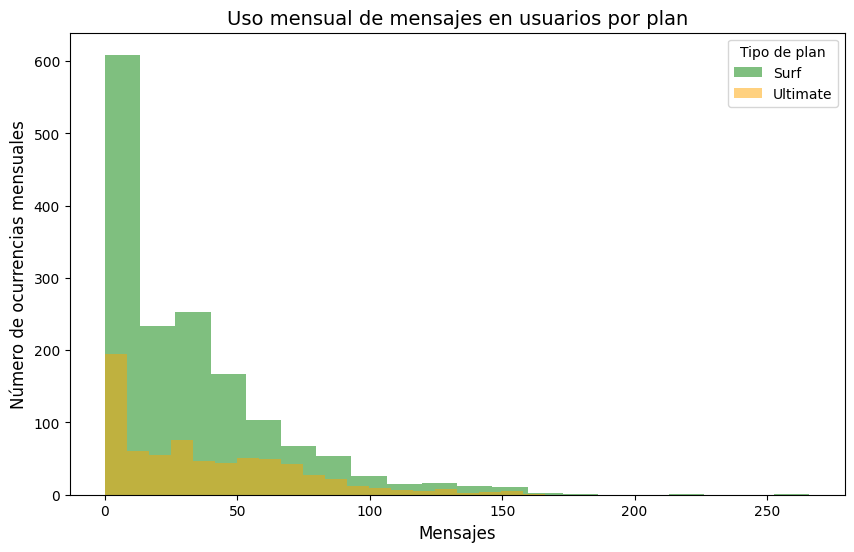

In [80]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Visualización de los mensajes mensuales por plan.
plt.figure(figsize=(10, 6))
surf_users['mess_per_month'].plot(kind='hist', bins=20, color='green', alpha=0.5, legend=True)
ultimate_users['mess_per_month'].plot(kind='hist', bins=20, color='orange', alpha=0.5, legend=True)

# Agregar título y etiquetas a los ejes
plt.title("Uso mensual de mensajes en usuarios por plan", fontsize=14)
plt.xlabel("Mensajes", fontsize=12)
plt.ylabel("Número de ocurrencias mensuales", fontsize=12)
plt.legend(['Surf', 'Ultimate'], title='Tipo de plan')

# Mostrar el gráfico
plt.show()

In [81]:
# Calcula la media y la varianza del uso de mensajes mensual.
# Media y varianza para usuarios Surf.
surf_mess_mean = all_month_data[all_month_data['plan'] == 'surf']['mess_per_month'].mean()
surf_mess_var = np.var(all_month_data[all_month_data['plan'] == 'surf']['mess_per_month'])

# Media y varianza para usuarios Ultimate.
ultimate_mess_mean = all_month_data[all_month_data['plan'] == 'ultimate']['mess_per_month'].mean()
ultimate_mess_var = np.var(all_month_data[all_month_data['plan'] == 'ultimate']['mess_per_month'])


print(f'El promedio del uso de mensajes es de {surf_mess_mean:.2f} mensajes para usuarios Surf y de {ultimate_mess_mean:.2f} mensajes para usuarios Ultimate.')
print(f'La varianza del uso de mensajes es de {surf_mess_var:.2f} mensajes cuadrados para usuarios Surf y de {ultimate_mess_var:.2f} mensajes cuadrados para usuarios Ultimate.')

El promedio del uso de mensajes es de 31.16 mensajes para usuarios Surf y de 37.55 mensajes para usuarios Ultimate.
La varianza del uso de mensajes es de 1126.01 mensajes cuadrados para usuarios Surf y de 1207.08 mensajes cuadrados para usuarios Ultimate.


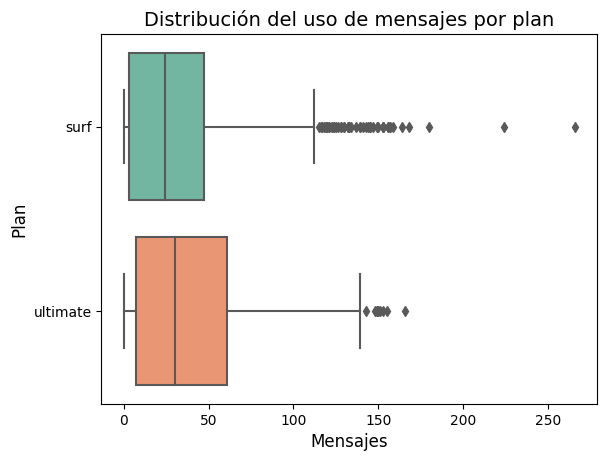

In [82]:
# Traza un diagrama de caja para visualizar la distribución del uso de mensajes
sns.boxplot(data=all_month_data, x="mess_per_month", y="plan", palette="Set2", order=["surf", "ultimate"])

# Agregar título y etiquetas a los ejes
plt.title("Distribución del uso de mensajes por plan", fontsize=14)
plt.xlabel("Mensajes", fontsize=12)
plt.ylabel("Plan", fontsize=12)

# Mostrar el gráfico
plt.show()

Para iniciar, podemos observar que los mensajes de texto no son un mecanismo de comunicación tan popular como las llamadas.

El histograma y el diagrama de caja nos describen una distribución sesgada a la derecha, un comportamiento similar al que ya evidenciamos en las llamadas. Algo interesante aquí es que alrededor del 25% de los usuarios Surf superan la cantidad de mensajes que incluye su plan, estos usuarios pueden llegar a usar mensajes tanto o en algunos casos más que los usuarios ultimate, podrían ser considerados como usuarios potenciales para una migración a la tarifa Ultimate, sin embargo, se debe evaluar en conjunto con sus otros patrones de consumo para determinar si es una migración rentable.

### 3.3 Análisis de internet. <a id='internet_analysis'></a>

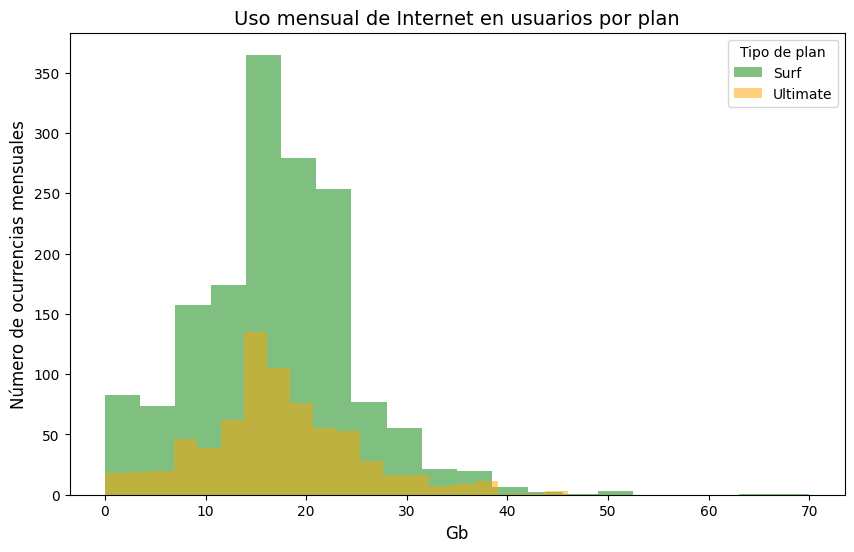

In [83]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Visualización del trafico de Internet mensual por plan.
plt.figure(figsize=(10, 6))
surf_users['gb_per_month'].plot(kind='hist', bins=20, color='green', alpha=0.5, legend=True)
ultimate_users['gb_per_month'].plot(kind='hist', bins=20, color='orange', alpha=0.5, legend=True)

# Agregar título y etiquetas a los ejes
plt.title("Uso mensual de Internet en usuarios por plan", fontsize=14)
plt.xlabel("Gb", fontsize=12)
plt.ylabel("Número de ocurrencias mensuales", fontsize=12)
plt.legend(['Surf', 'Ultimate'], title='Tipo de plan')

# Mostrar el gráfico
plt.show()

In [84]:
# Calcula la media y la varianza del uso de Internet mensual.
# Media y varianza para usuarios Surf.
surf_int_mean = all_month_data[all_month_data['plan'] == 'surf']['gb_per_month'].mean()
surf_int_var = np.var(all_month_data[all_month_data['plan'] == 'surf']['gb_per_month'])

# Media y varianza para usuarios Ultimate.
ultimate_int_mean = all_month_data[all_month_data['plan'] == 'ultimate']['gb_per_month'].mean()
ultimate_int_var = np.var(all_month_data[all_month_data['plan'] == 'ultimate']['gb_per_month'])


print(f'El promedio del uso de Internet es de {surf_int_mean:.2f} Gb para usuarios Surf y de {ultimate_int_mean:.2f} Gb para usuarios Ultimate.')
print(f'La varianza del uso de Internet es de {surf_int_var:.2f} Gb cuadrados para usuarios Surf y de {ultimate_int_var:.2f} Gb cuadrados para usuarios Ultimate.')

El promedio del uso de Internet es de 16.67 Gb para usuarios Surf y de 17.31 Gb para usuarios Ultimate.
La varianza del uso de Internet es de 61.54 Gb cuadrados para usuarios Surf y de 58.75 Gb cuadrados para usuarios Ultimate.


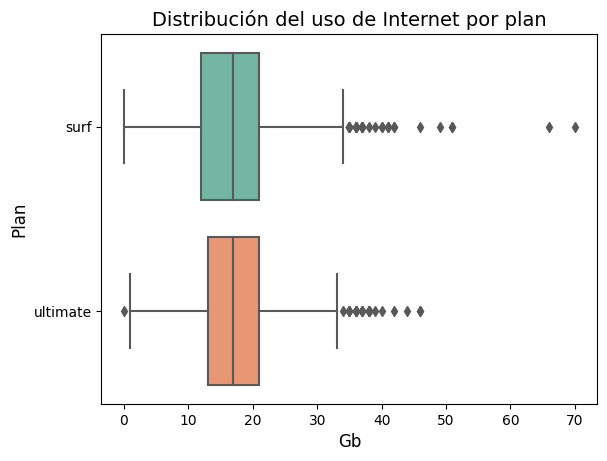

In [85]:
# Traza un diagrama de caja para visualizar la distribución del uso de Internet
sns.boxplot(data=all_month_data, x="gb_per_month", y="plan", palette="Set2", order=["surf", "ultimate"])

# Agregar título y etiquetas a los ejes
plt.title("Distribución del uso de Internet por plan", fontsize=14)
plt.xlabel("Gb", fontsize=12)
plt.ylabel("Plan", fontsize=12)

# Mostrar el gráfico
plt.show()

El consumo de Internet para ambos planes nuevamente es muy similar; sin embargo, algo apreciable es que los usuarios Surf tienen una varianza más grande que los usuarios Ultimate a pesar de tener un límite menor de uso de datos, su comportamiento en el uso de datos es similar e incluso en algunos casos sobrepasa el de usuarios Ultimate.

Alrededor del 50% de los usuarios Surf superan el límite de datos de su plan, mientras que solo alrededor del 10% de los usuarios Ultimate lo hacen. Esto podría indicar una oportunidad para ofrecerles una migración a la tarifa Ultimate, especialmente a los usuarios Surf que superan los 20 GB.

## 3.4 Análisis de ingresos. <a id='income_analysis'></a>

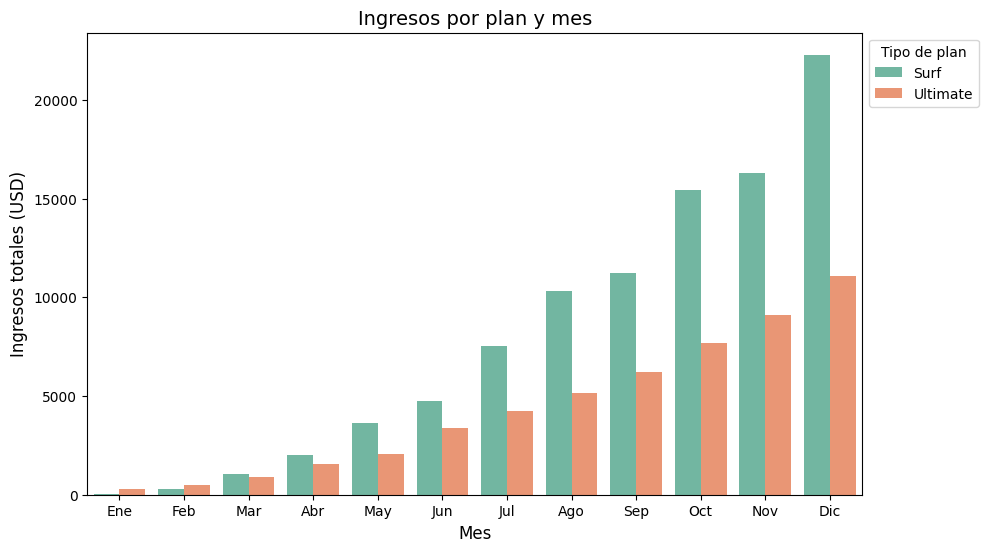

In [ ]:
# Compara ingresos totales por cada plan y por cada mes.
income_by_plan_and_month = all_month_data.groupby(['plan', 'month'])['income'].sum()

# Configurar el nuevo dataframe
income_by_plan_and_month = pd.DataFrame(income_by_plan_and_month)
income_by_plan_and_month.reset_index(inplace=True)

# Crear la visualización
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=income_by_plan_and_month, x='month', y='income', hue='plan', palette=custom_palette, ci=None)

# Cambiar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Surf', 'Ultimate'], title="Tipo de plan", loc="upper left", bbox_to_anchor=(1, 1))

# Agregar título y etiquetas a los ejes
plt.title("Ingresos por plan y mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ingresos totales (USD)", fontsize=12)
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

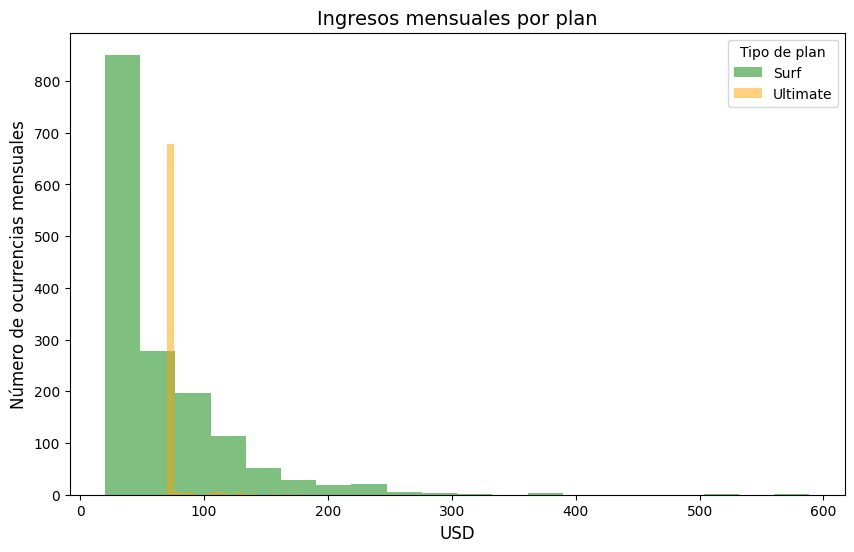

In [87]:
# Compara la cantidad de ingresos por usuarios por plan
# Visualización del ingreso mensual por plan.
plt.figure(figsize=(10, 6))
surf_users['income'].plot(kind='hist', bins=20, color='green', alpha=0.5, legend=True)
ultimate_users['income'].plot(kind='hist', bins=20, color='orange', alpha=0.5, legend=True)

# Agregar título y etiquetas a los ejes
plt.title("Ingresos mensuales por plan", fontsize=14)
plt.xlabel("USD", fontsize=12)
plt.ylabel("Número de ocurrencias mensuales", fontsize=12)
plt.legend(['Surf', 'Ultimate'], title='Tipo de plan')

# Mostrar el gráfico
plt.show()

In [88]:
# Calcula la media y la varianza de los ingresos.
# Media y varianza para usuarios Surf.
surf_income_mean = all_month_data[all_month_data['plan'] == 'surf']['income'].mean()
surf_income_var = np.var(all_month_data[all_month_data['plan'] == 'surf']['income'])

# Media y varianza para usuarios Ultimate.
ultimate_income_mean = all_month_data[all_month_data['plan'] == 'ultimate']['income'].mean()
ultimate_income_var = np.var(all_month_data[all_month_data['plan'] == 'ultimate']['income'])


print(f'El promedio de ingresos es de {surf_income_mean:.2f} USD para usuarios Surf y de {ultimate_income_mean:.2f} USD para usuarios Ultimate.')
print(f'La varianza de ingresos es de {surf_income_var:.2f} USD cuadrados para usuarios Surf y de {ultimate_income_var:.2f} USD cuadrados para usuarios Ultimate.')

El promedio de ingresos es de 60.33 USD para usuarios Surf y de 72.31 USD para usuarios Ultimate.
La varianza de ingresos es de 3052.16 USD cuadrados para usuarios Surf y de 129.67 USD cuadrados para usuarios Ultimate.


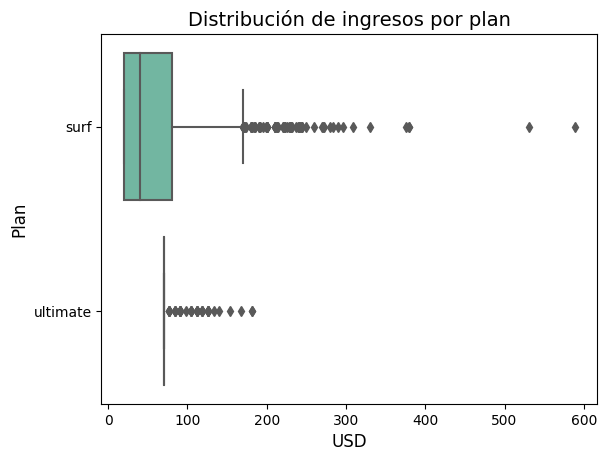

In [89]:
# Traza un diagrama de caja para visualizar la distribución de ingresos
sns.boxplot(data=all_month_data, x="income", y="plan", palette="Set2", order=["surf", "ultimate"])

# Agregar título y etiquetas a los ejes
plt.title("Distribución de ingresos por plan", fontsize=14)
plt.xlabel("USD", fontsize=12)
plt.ylabel("Plan", fontsize=12)

# Mostrar el gráfico
plt.show()

En la distribución mensual se puede apreciar cómo el plan Surf aumenta los ingresos a lo largo del año, inclusive a partir de mitad de año es alrededor del doble de los ingresos del plan Ultimate en cada mes.

Observando el histograma, concluimos que pocos usuarios del plan Ultimate superan su tarifa mensual base de 70 dólares; sin embargo, en el plan Surf hay una gran cantidad de usuarios que superan por mucho inclusive la tarifa base del plan Ultimate. Esto también es respaldado observando los promedios de cada plan, en donde el plan Ultimate maneja su promedio muy cerca a la tarifa base, mientras que en el plan Surf el promedio aumenta gracias a todos estos usuarios que consumen mucho más que los beneficios incluidos en su plan.

Con el diagrama de caja podemos observar que el plan Surf tiene una gran cantidad de usuarios que superan los 70 dólares mensuales, mientras que el plan Ultimate no tiene usuarios que superen los 70 dólares mensuales. Esto indica que el plan Surf es más rentable para la empresa, ya que tiene un mayor número de usuarios que generan ingresos adicionales.

Un plan de negocios exitoso debe tener un equilibrio entre la cantidad de usuarios y los ingresos generados. En este caso, el plan Surf tiene más usuarios que el plan Ultimate, pero también genera más ingresos por usuario. Esto sugiere que el plan Surf es más rentable para la empresa.

También se podría considerar ofrecer el plan Ultimate a aquellos usuarios que pretendan abandonar el servicio desde el plan Surf y que tengan altos comportamientos de consumo, esto sería más atractivo para ellos debido a su mayor límite de minutos, mensajes y datos asegurándoles un precio menor y más estable a lo largo de los meses.

## 4. Pruebas de las hipótesis estadísticas. <a id='hypothesis'></a>

En este apartado se realizarán pruebas de hipótesis para determinar si hay diferencias significativas entre ciertos ingresos mensuales. Para esto, se utilizará la prueba t de Student para muestras independientes, y utilizaremos un porcentaje de significancia del 5% (0.05).

### 4.1. Hipótesis 1: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere. <a id='hypothesis_1'></a>

Hipótesis nula: los ingresos promedio procedentes de los usuarios Surf son iguales a los procedentes de los usuarios Ultimate.

Hipótesis altermativa: los ingresos promedio procedentes de los usuarios Surf son diferentes a los procedentes de los usuarios Ultimate.

In [90]:
# Prueba las hipótesis
# Encontramos los ingresos que compararemos en la prueba de hipótesis.
ingresos_prom_surf = all_month_data[all_month_data['plan'] == 'surf']['income']
ingresos_prom_ultimate = all_month_data[all_month_data['plan'] == 'ultimate']['income']

alpha = 0.05

resultados = st.ttest_ind(ingresos_prom_surf, ingresos_prom_ultimate, equal_var=False)

print('valor p: ', resultados.pvalue)

# Comparamos el valor p con el umbral
if resultados.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  3.6278039040985444e-16
Rechazamos la hipótesis nula



El valor p es increíblemente bajo, por lo que la posibilidad de que los ingresos provenientes de los usuarios del plan Surf y del plan Ultimate sean iguales es casi imposible. Esto nos permite rechazar la hipótesis nula y aceptar la hipótesis original.

Concluimos entonces que los ingresos promedio de los usuarios de las tarifas Ultimate y Surf difieren significativamente, siendo el ingreso promedio de los usuarios del plan Surf mayor que el de los usuarios del plan Ultimate.


### 4.2. Hipótesis 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones. <a id='hypothesis_2'></a>

Hipótesis nula: el ingreso promedio procedente de los usuarios del area NY-NJ es igual a el procedente de los usuarios de otras regiones.

Hipótesis altermativa: el ingreso promedio procedente de los usuarios del area NY-NJ es diferente a el procedente de los usuarios de otras regiones.

In [91]:
# Prueba las hipótesis
usuarios_NY_NJ = users_df[users_df['city'].str.contains('NY-NJ')]['user_id']
income_usuarios_NY_NJ = all_month_data[all_month_data['user_id'].isin(usuarios_NY_NJ)]['income']

usuarios_diff_NY_NJ = users_df[~users_df['city'].str.contains('NY-NJ')]['user_id']
income_usuarios_diff_NY_NJ = all_month_data[all_month_data['user_id'].isin(usuarios_diff_NY_NJ)]['income']

alpha = 0.05

resultados = st.ttest_ind(income_usuarios_NY_NJ, income_usuarios_diff_NY_NJ, equal_var=False)

print('valor p: ', resultados.pvalue)

if resultados.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.03123778844458518
Rechazamos la hipótesis nula


El valor p es del 3.1% es más bajo que el umbral alfa de significancia que definimos del 5%, en este caso hay alrededor de un 3% de posibilidades de que la hipótesis nula se cumpla (que los ingresos de los usuarios de NY-NJ sea igual a la de usuarios de otras regiones), esto nos permite descartar la hipótesis nula de acuerdo a los criterios que definimos, pero no implica que sea un evento imposible de que suceda.

Concluimos entonces que el ingreso promedio de los usuarios en el área de Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

## Conclusiones <a id='end'></a>

De nuestro estudio podemos destacar las siguientes conclusiones:

- Los usuarios Surf y Ultimate tienen comportamientos muy similares en el uso de mensajes, llamadas y su duración; sin embargo, presentan una diferencia un poco más leve en cuanto al uso de Internet, demostrando que los usuarios Surf utilizan más GB a lo largo del mes.

- Los ingresos del plan Surf son mayores que los ingresos del plan Ultimate, inclusive en los últimos meses del año duplican su valor. Esto se debe en gran medida a que alrededor del 50% de los usuarios Surf demuestran exceder el límite de GB que incluye su plan (15) y en una menor medida a que alrededor del 25% de los usuarios Surf superan el límite de mensajes incluidos en su plan (50).

- Los ingresos de los usuarios del plan Ultimate son muy cercanos a la tarifa base de 70 dólares, siendo un ingreso menos volátil para la empresa y un plan más estable para los clientes.

- El plan Surf tiene un mayor número de usuarios que el plan Ultimate, lo que indica que es más popular entre los clientes.

- El presupuesto del plan publicitario debería enfocarse en el plan Surf, ya que genera mayor cantidad de ingresos que el plan Ultimate.

- Se recomienda ofrecer el plan Ultimate a aquellos usuarios que superan los límites de su plan Surf y piensan en abandonar el servicio. Esto podría ser más atractivo para ellos y mantener ingresos para la empresa ante una posible pérdida de clientes.